##  This notebook shows integration of PBMC datasets

In [1]:
import os
os.chdir("../../")

In [2]:
import scanpy as sc
import numpy as np
from scipy import sparse
sc.settings.set_figure_params(dpi=200, frameon=False)

reading datasets 

In [3]:
cell_type_key = "CellType"
condition_key = "Method"

In [17]:
adata_6_tech = sc.read("./data/PBMC/broad_pbmc_count.h5ad")
adata_6_tech.X = sparse.csr_matrix(adata_6_tech.X)
adata_6_tech.obs["study"] = adata_6_tech.obs["Method"].values
# adata_pbmc_10x = sc.read("./data/PBMC/10x_PBMC_counts.h5ad")
# adata_pbmc_10x.obs["study"] = adata_pbmc_10x.obs["method"].tolist()
# adata_pbmc_68k = sc.read("./data/PBMC/pbmc_68k.h5ad")
# adata_pbmc_68k.obs["study"] = "10x PBMC 68k"
# adata_small_3k = sc.read("./data/PBMC/pbmc3k.h5ad")
# adata_small_3k = sc.AnnData(
#     adata_small_3k.layers["counts"], var=adata_small_3k.var, obs=adata_small_3k.obs)
# adata_small_3k.obs["study"] = "10x PBMC 3k"

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [18]:
adata_6_tech.obs['Method'].value_counts()

inDrops              6584
Drop-seq             6584
10x Chromium V2 B    3222
10x Chromium V2 A    3222
Smart-seq2            526
CEL-Seq2              417
Name: Method, dtype: int64

In [19]:
sc.pp.normalize_per_cell(adata_6_tech)
sc.pp.log1p(adata_6_tech)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [20]:
sc.pp.neighbors(adata_6_tech)
sc.tl.umap(adata_6_tech)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/mohsen/.local/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 11 separate connected components using meta-embedding (experimental)
  n_components
/home/mohsen/.local/lib/python3.6/site-packages/scikit_learn-0.21.3-py3.6-linux-x86_64.egg/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [21]:
sc.set_figure_params(dpi=300)

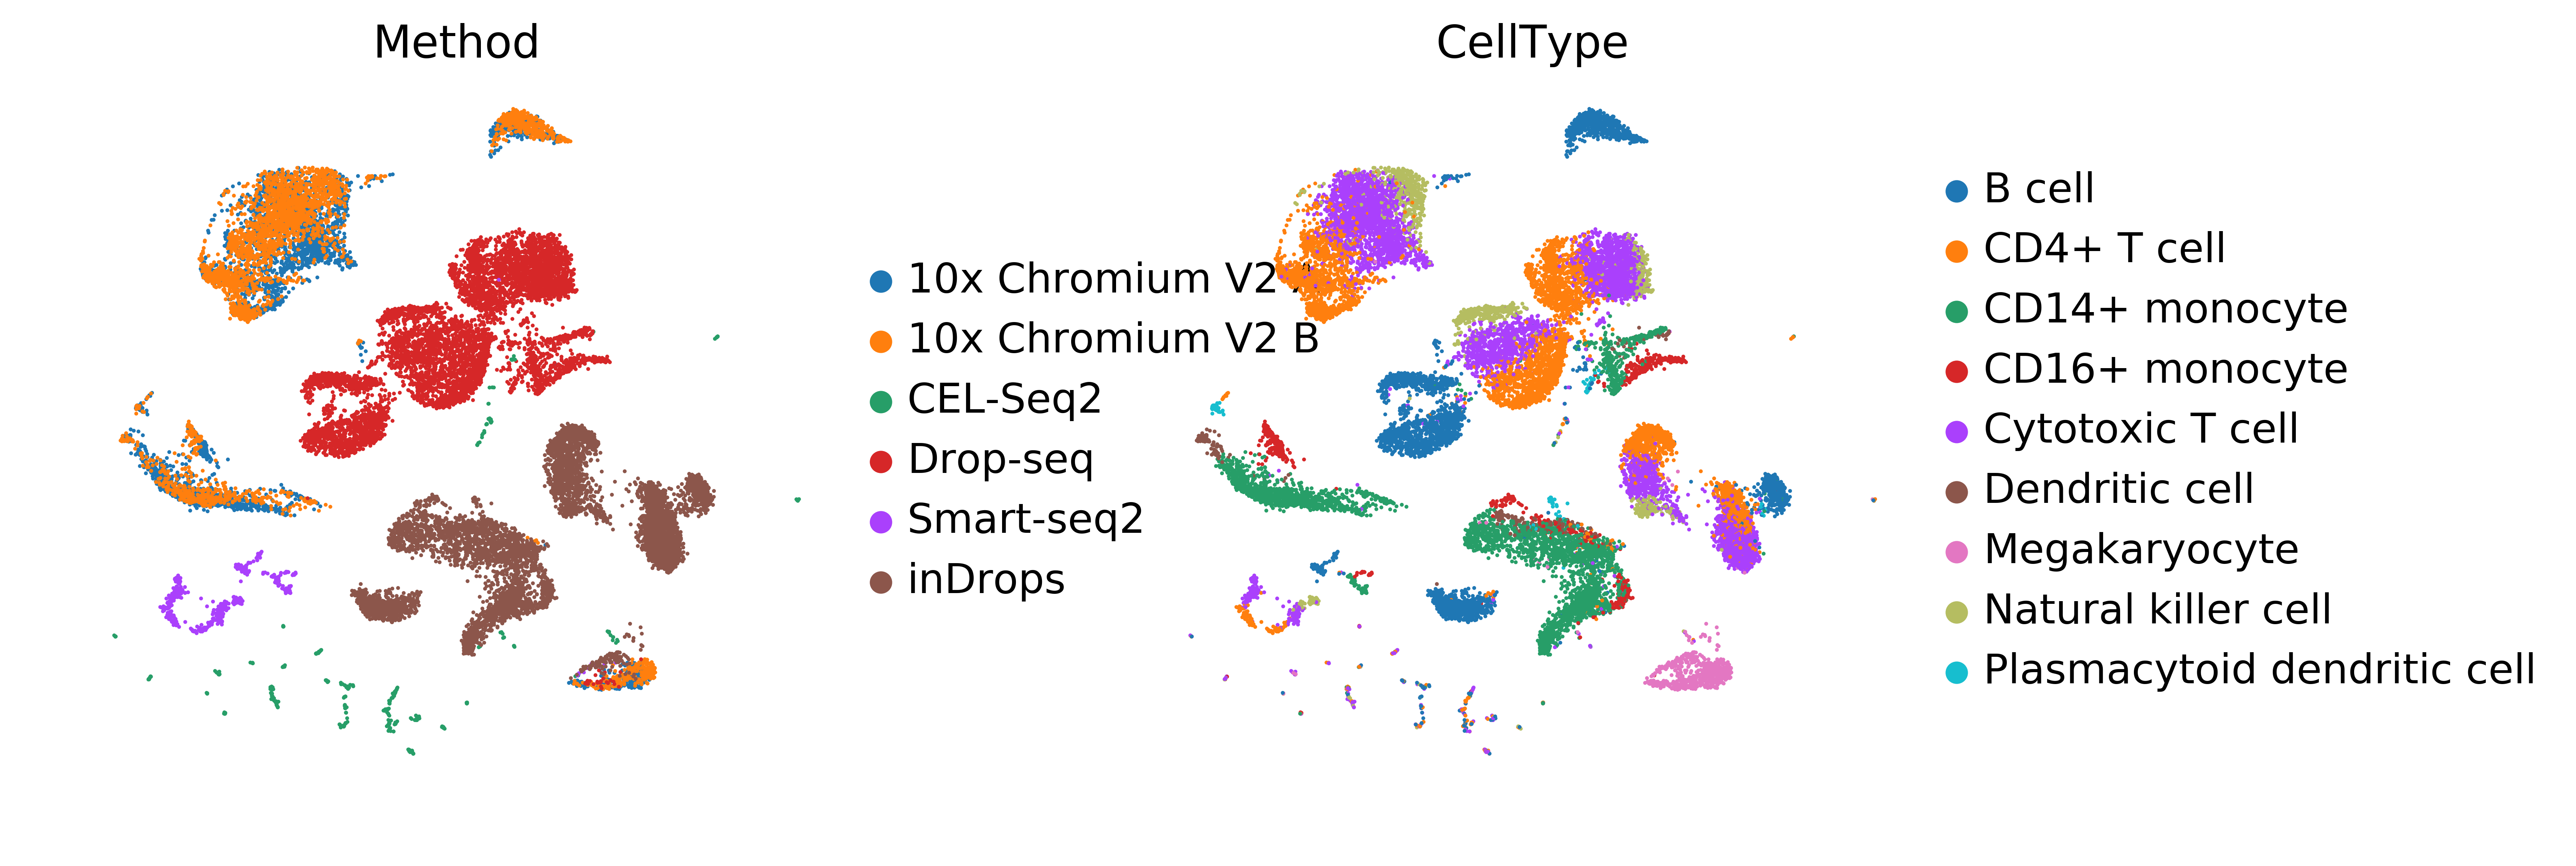

In [22]:
sc.pl.umap(adata_6_tech, color=["Method", "CellType"], wspace=0.3, frameon=False)

We try to make labels names simillar 

### broad datasets

In [49]:
adata_6_tech.obs["CellType"].cat.categories

Index(['B cell', 'CD4 T cell', 'CD14 monocyte', 'CD16 monocyte',
       'Cytotoxic T cell', 'Dendritic cell', 'Megakaryocyte',
       'Natural killer cell', 'Plasmacytoid dendritic cell'],
      dtype='object')

In [50]:
adata_6_tech.rename_categories("CellType",['B cell', 'CD4 T cell', 'CD14 Monocyte', 'CD16 monocyte',
       'Cytotoxic T cell', 'Dendritic cell', 'Megakaryocyte',
       'Natural killer cell', 'Plasmacytoid dendritic cell'])

In [51]:
adata_6_tech.obs["CellType"].cat.categories

Index(['B cell', 'CD4 T cell', 'CD14 Monocyte', 'CD16 monocyte',
       'Cytotoxic T cell', 'Dendritic cell', 'Megakaryocyte',
       'Natural killer cell', 'Plasmacytoid dendritic cell'],
      dtype='object')

In [52]:
adata_6_tech.obs["cell_type"] = adata_6_tech.obs["CellType"].values

### 10x datasets

In [53]:
adata_pbmc_10x.obs["cell_type"].cat.categories

Index(['B cell', 'CD4 T cell', 'CD8 T cell', 'Hematopoietic stem cell',
       'Megakaryocyte', 'CD14 Monocyte', 'FCGR3A Monocytes',
       'Natural killer cell', 'Plasmacytoid dendritic cell'],
      dtype='object')

In [54]:
adata_pbmc_10x.rename_categories("cell_type",['B cell', 'CD4 T cell', 'CD8 T cell', 'Hematopoietic stem cell',
       'Megakaryocyte', 'CD14 Monocyte', 'FCGR3A Monocytes', 'Natural killer cell',
       'Plasmacytoid dendritic cell'])

### pbmc 68k

In [55]:
adata_pbmc_68k.obs["bulk_labels"].cat.categories

Index(['CD4+ T Helper2', 'CD4+/CD25 T Reg', 'CD4+/CD45RA+/CD25- Naive T',
       'CD4+/CD45RO+ Memory', 'CD8+ Cytotoxic T',
       'CD8+/CD45RA+ Naive Cytotoxic', 'CD14 Monocyte', 'CD19+ B', 'CD34+',
       'CD56+ NK', 'Dendritic cell'],
      dtype='object')

In [56]:
adata_pbmc_68k.rename_categories("bulk_labels",['CD4+ T Helper2', 'CD4+/CD25 T Reg', 'CD4+/CD45RA+/CD25- Naive T',
       'CD4+/CD45RO+ Memory', 'CD8+ Cytotoxic T',
       'CD8+/CD45RA+ Naive Cytotoxic', 'CD14 Monocyte', 'CD19+ B', 'CD34+',
       'CD56+ NK', 'Dendritic cell'])

In [57]:
adata_pbmc_68k.obs["cell_type"] = adata_pbmc_68k.obs["bulk_labels"].values

### 3k 10x PBMC

In [58]:
adata_small_3k.obs["louvain"].cat.categories

Index(['CD4 T cell', 'CD14 Monocytes', 'B cell', 'CD8 T cell',
       'Natural killer cell', 'FCGR3A Monocytes', 'Dendritic cell',
       'Megakaryocytes'],
      dtype='object')

In [59]:
adata_small_3k.rename_categories("louvain", ['CD4 T cell', 'CD14 Monocyte', 'B cell', 'CD8 T cell', 'Natural killer cell', 'FCGR3A Monocytes',
                                               'Dendritic cell', 'Megakaryocyte'])

In [60]:
adata_small_3k.obs["cell_type"] = adata_small_3k.obs["louvain"].values

### Mearging all datasets

In [61]:
adata_all = sc.AnnData.concatenate(adata_6_tech,adata_pbmc_10x,adata_pbmc_68k,adata_small_3k)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


saving counts

In [62]:
adata_all.layers["counts"] = adata_all.X

In [63]:
sc.pp.normalize_per_cell(adata_all)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [64]:
sc.pp.log1p(adata_all)

In [65]:
np.unique(adata_all.obs["study"].tolist())

array(['10X_3prime', '10X_5prime', '10x Chromium V2 A',
       '10x Chromium V2 B', '10x PBMC 3k', '10x PBMC 68k', 'CEL-Seq2',
       'Drop-seq', 'Smart-seq2', 'inDrops'], dtype='<U17')

## visualization

In [66]:
sc.pp.neighbors(adata_all)
sc.tl.umap(adata_all)

         Falling back to preprocessing with `sc.pp.pca` and default params.


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


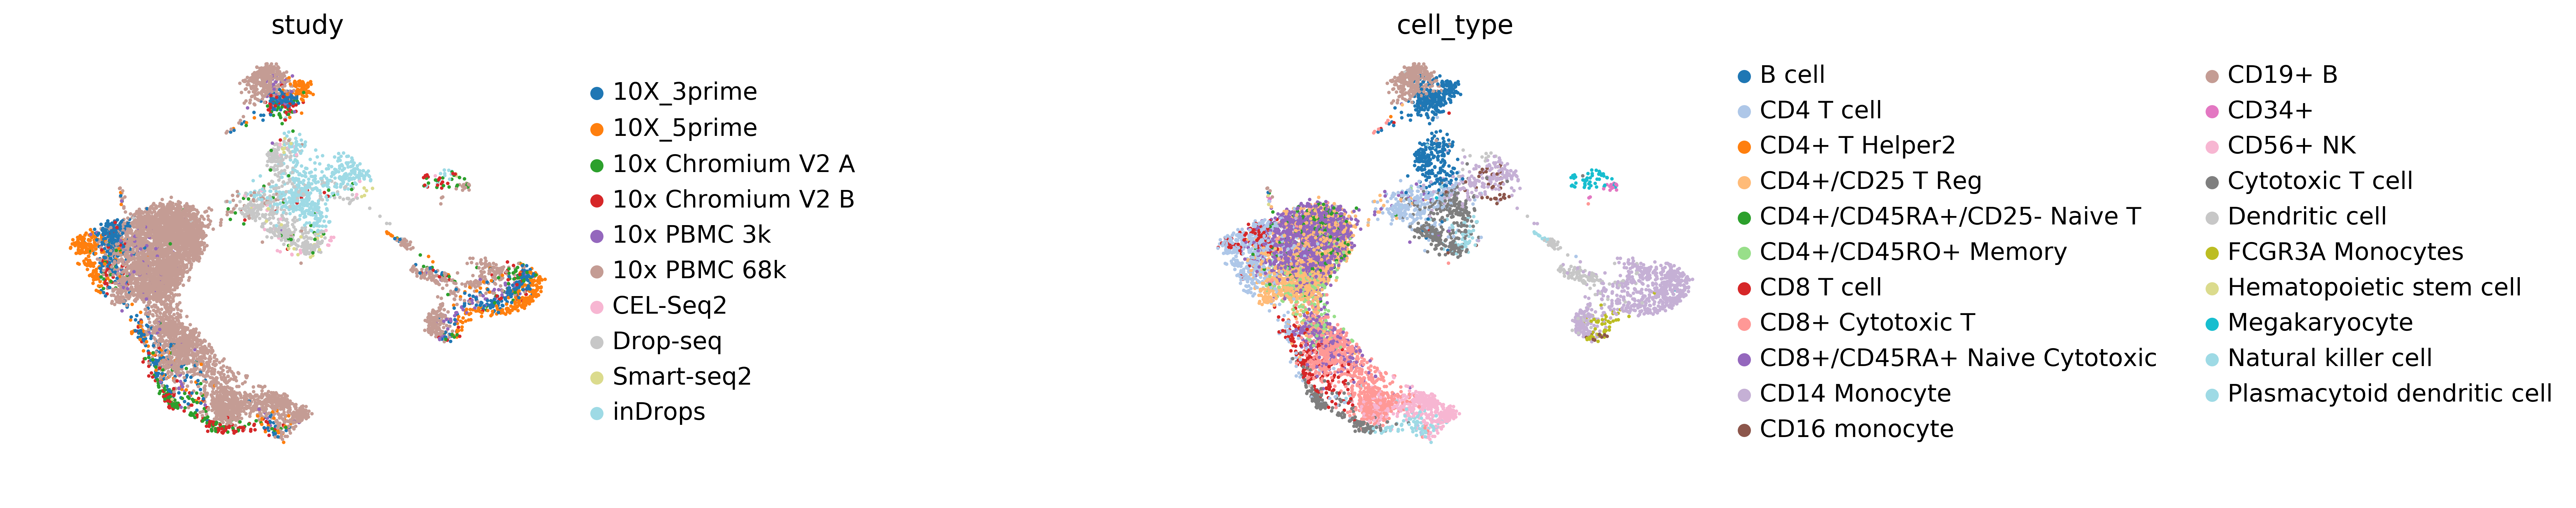

In [82]:
sc.pl.umap(sc.pp.subsample(adata_all, fraction=.4, copy=True), color=[
           "study", "cell_type"], palette="tab20", wspace=True)

## saving data set for later use 

In [73]:
adata_all.write("./data/PBMC/PBMC_all.h5ad")

In [74]:
adata_all

AnnData object with n_obs × n_vars = 107248 × 1793 
    obs: 'CBC', 'CellType', 'Experiment', 'Method', 'batch', 'bulk_labels', 'cell_type', 'louvain', 'method', 'n_counts', 'n_genes', 'percent_mito', 'study'
    var: 'ENS-0', 'Name-0', 'gene_ids-1', 'n_counts-2', 'gene_ids-3', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3'
    uns: 'neighbors', 'study_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'